# 積分(Integration)
### $\int_{x1}^{x2} f(x)\;dx$
### 其中:
### $\int$：總和(The sum of)
### $\int f(x)\;dx$：連續型函數覆蓋的面積或體積。
### x1、x2：積分的範圍

### 積分是微分的相反
### $\int f(x)\;dx$
### 如果 
### $\int x\;dx = \frac{1}{2} x^2$

# 積分通式
### $\int x^n\;dx$ = $x^{n+1}/n+C$ 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [3]:
def f(x):
    return x

x = range(0, 11)
y = [f(a) for a in x]

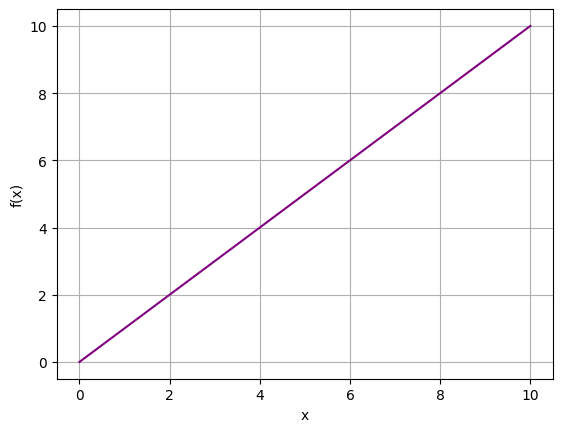

In [4]:
# 繪圖
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.plot(x,y, color='purple')
plt.show()

## 積分通常有範圍，例如從0~2。
### 微分是算斜率，積分是算面積，如下圖橘色面積。

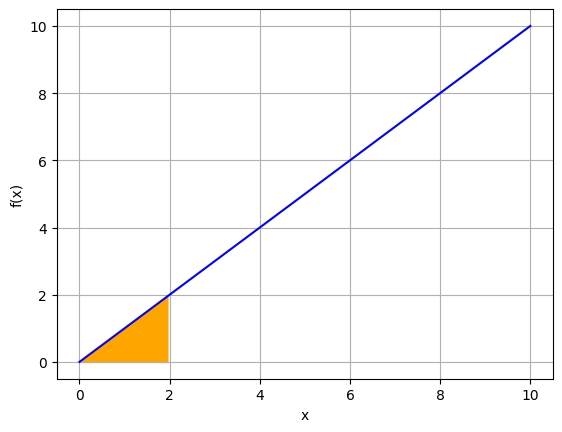

In [5]:
# 繪圖
def plot_integral(x, y, f):
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.plot(x,y, color='blue')

    # 覆蓋面積渲染
    section = np.arange(0, 2, 1/20)
    plt.fill_between(section,f(section), color='orange')
    plt.show()
    
plot_integral(x, y, f)    

## 積分求解
### $\int_0^2 x\;dx\\ = \frac{1}{2} x^2\ \big|_0^2\\
= \frac{1}{2} 2^2 - \frac{1}{2} 0^2\\
= \frac{4}{2} - \frac{0}{2} x^2\\ = 2$

## ***scipy.integrate.quad*** 函數可計算積分。

In [6]:
import scipy.integrate as integrate

def f(x):
    return x

# i：積分值，e：絕對誤差(absolute error)
i, e = integrate.quad(lambda x: f(x), 0, 2)
print(i, e)

2.0 2.220446049250313e-14


In [7]:
#簡寫
i, e = integrate.quad(f, 0, 2)
print(i, e)

2.0 2.220446049250313e-14


In [8]:
#簡寫
i, e = integrate.quad(lambda x: x, 0, 2)
print(i, e)

2.0 2.220446049250313e-14


In [9]:
# x^2
i, e = integrate.quad(lambda x: x**2, 0, 2)
print (i, e)

2.6666666666666665 2.9605947323337504e-14


### $\int_0^3 3x^2 + 2x + 1\;dx$

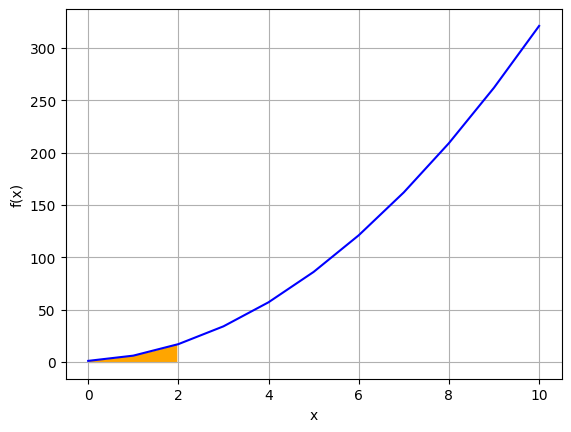

In [10]:
def g(x):
    return 3 * x**2 + 2 * x + 1

# Create an array of x values from 0 to 10
x = range(0, 11)
y = [g(a) for a in x]
plot_integral(x, y, g)  

$\int_0^3= \frac{3}{3} x^3 + \frac{2}{2} x^2 + x\ \big|_0^3\\
= \frac{3}{3} 3^3 + \frac{2}{2} 3^2 + 3 - \frac{3}{3} 0^3 - \frac{2}{2} 0^2 + 0\\
= 27 + 9 + 3 + 0 + 0 + 0\\
= 39$

In [11]:
i, e = integrate.quad(lambda x: 3 * x**2 + 2 * x + 1, 0, 3)
print(i)

39.0


## Quiz 3、4 練習

## 無窮大積分
### $\int^{\infty}_0 e^{-5x} dx$

In [12]:
i, e = integrate.quad(lambda x: np.exp(-x*5), 0, np.inf)
print('Integral: ' + str(i))
print('Absolute Error: ' + str(e))

Integral: 0.20000000000000004
Absolute Error: 1.5606666928455837e-11


## 標準常態分配：平均數為0，標準差為1的常態分配。
### 機率密度函數：
### $\frac{1}{2 \pi} e^{\frac{-x^2}{\sqrt(2 \pi)}}$
### 計算機率：總和應為1。
### $\int_{-\infty}^{\infty} \frac{1}{2 \pi} e^{\frac{-x^2}{\sqrt(2 \pi)}} dx$

## 一般的常態分配
https://zh.wikipedia.org/wiki/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83

In [13]:
norms = lambda x: np.exp(-x**2/2.0)/np.sqrt(2.0 * math.pi) #3.14159)
i, e = integrate.quad(norms, -np.inf, np.inf)

print('Integral: ' + str(i))
print('Absolute Error: ' + str(e))

Integral: 0.9999999999999997
Absolute Error: 1.0178191389088507e-08


# 各種分配(distributions)
https://medium.com/@ciortanmadalina/overview-of-data-distributions-87d95a5cbf0a

## 機率密度函數(Probability density function，pdf)
## 離散型變數之機率密度函數：pmf(Probability mass function)

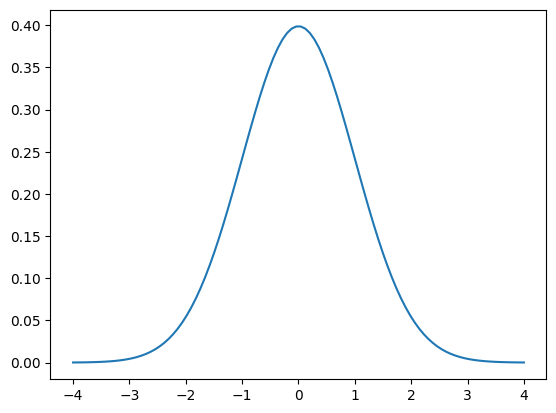

In [14]:
# 繪製常態分配之機率密度函數
x = np.linspace(0 - 4 * 1, 0 + 4 * 1, 100)
y = np.exp(-x**2/2.0)/np.sqrt(2.0 * math.pi) 
plt.plot(x, y)

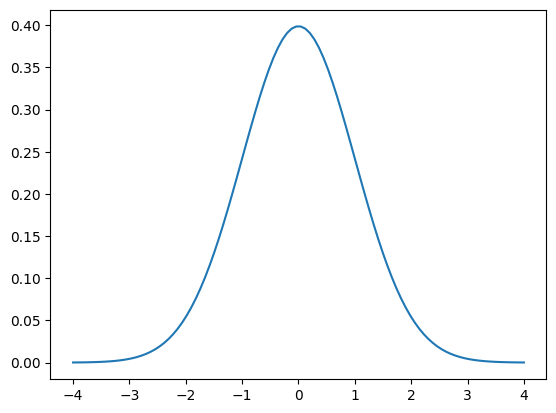

In [15]:
# 方法 2
from scipy.stats import norm

mean = 0
std = 1
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

In [16]:
i, e = integrate.quad(norms, -1, 1)
print('Integral: ' + str(i))

Integral: 0.682689492137086


## 繪製常態分配 $\pm$ 1倍標準差

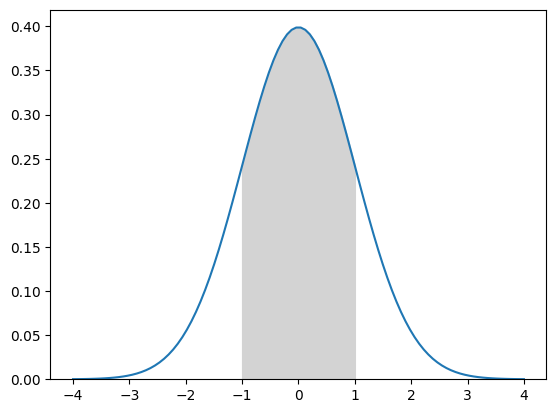

In [17]:
mean, std = 0, 1
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

a = np.linspace(mean - std, mean + std, 100)
b = norm.pdf(a, mean, std)
plt.fill_between(a, b, 0, color = 'lightgray') 
plt.ylim(0);

## 繪製常態分配 $\pm$ 2倍標準差

In [18]:

i, e = integrate.quad(norms, -2, 2)

print('Integral: ' + str(i))

Integral: 0.9544997361036417


## 繪製常態分配 $\pm$ 3倍標準差

In [19]:
i, e = integrate.quad(norms, -3, 3)

print('Integral: ' + str(i))

Integral: 0.9973002039367399


## 95%信賴區間

In [20]:
i, e = integrate.quad(norms, -1.96, 1.96)

print('Integral: ' + str(i))

Integral: 0.9500042097035591


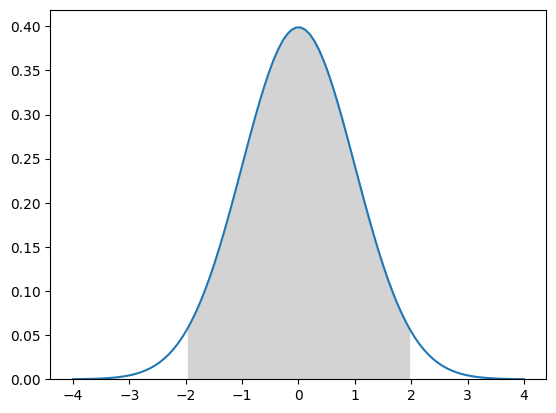

In [21]:
# Normal distribution chart
import matplotlib.pyplot as plt
from scipy.stats import norm

mean, std = 0, 1
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

# 灰色面積
a = np.linspace(mean - 1.96 * std, mean + 1.96 * std, 100)
b = norm.pdf(a, mean, std)
plt.fill_between(a, b, 0, color = 'lightgray') 
plt.ylim(0);

## 單尾之95%信賴區間

In [22]:
i, e = integrate.quad(norms, -1.65, 1.65)

print('Integral: ' + str(i))

Integral: 0.9010570639327039


## 累積分配函數(Cumulative Distribution Function, cdf)

In [23]:
mean, std = 0, 1
norm.cdf(mean + 1.65 * std, mean, std)

np.float64(0.9505285319663519)

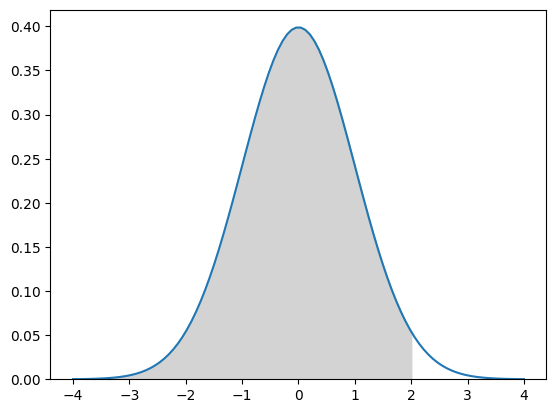

In [24]:
mean, std = 0, 1
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

a = np.linspace(mean - 4 * std, mean + 2 * std, 100)
b = norm.pdf(a, mean, std)
plt.fill_between(a, b, 0, color = 'lightgray') 
plt.ylim(0);

## 由機率反推CDF

In [25]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
mean, std = 0, 1
norm.ppf(0.95, mean, std)

np.float64(1.644853626951472)

# 結論：
# norm.cdf：已知範圍的右邊界，求機率。
# norm.ppf：已知機率，求範圍的右邊界。

## 假設檢定：
## 給定顯著水準5%，檢驗新藥是否有效 ==> 若實驗的平均檢驗值落在 $\mu + 1.65 \sigma$ 右邊，即認為新藥顯著有效。

## [高端新冠肺炎疫苗實驗計畫](https://zh.m.wikipedia.org/zh-tw/%E9%AB%98%E7%AB%AF%E6%96%B0%E5%86%A0%E8%82%BA%E7%82%8E%E7%96%AB%E8%8B%97)

## [2024年中華民國總統選舉民意調查](https://zh.wikipedia.org/zh-tw/2024年中華民國總統選舉民意調查)

## 蒙地卡羅模擬：使用隨機亂數繪製直方圖

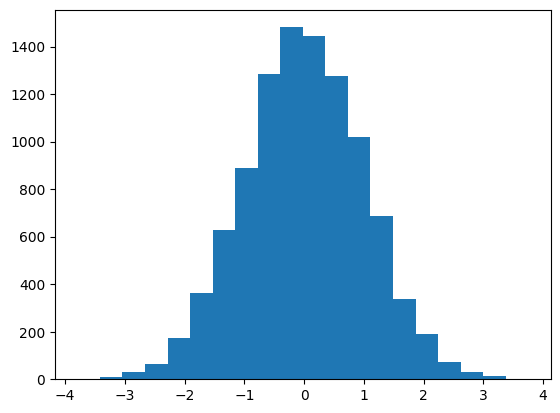

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(0, 1, 10000)
plt.hist(x, 20)
plt.show()

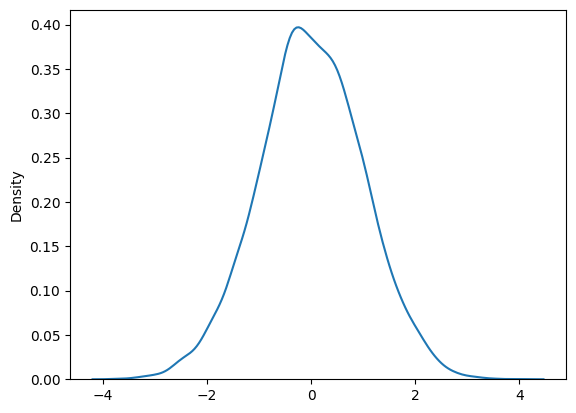

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.random.normal(0, 1, 10000)
sns.kdeplot(x)
plt.show()

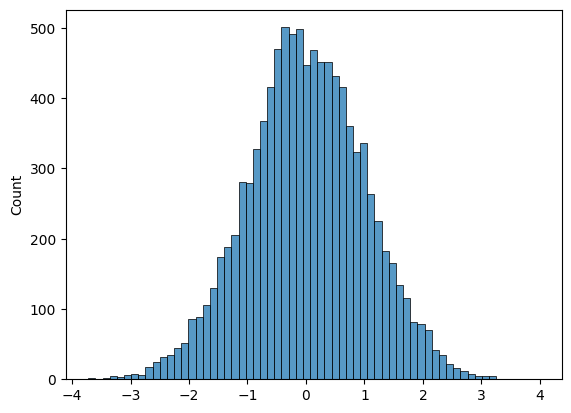

In [28]:
sns.histplot(x)
plt.show()

## Gamma 分配

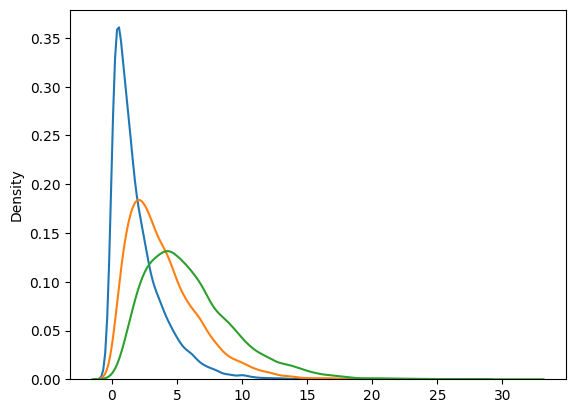

In [29]:
# Gamma 
# https://zh.wikipedia.org/wiki/%E4%BC%BD%E7%8E%9B%E5%88%86%E5%B8%83
x = np.random.gamma(1, 2, 10000)
sns.kdeplot(x)
x = np.random.gamma(2, 2, 10000)
sns.kdeplot(x)
x = np.random.gamma(3, 2, 10000)
sns.kdeplot(x)
plt.show()

## 指數分配(Exponential distribution)

In [30]:
# 指數分配(Exponential distribution)
# https://en.wikipedia.org/wiki/Exponential_distribution
import scipy.integrate as integrate
import numpy as np
import math

lambda1=1

# 定義變數 x
def exp1(x):
    return lambda1 * (math.e ** (-lambda1 * x)) 

i, e = integrate.quad(exp1, 0, np.inf)

print('Integral: ' + str(i))


Integral: 1.0


# 顯示數學式

In [31]:
import sympy
from sympy import init_printing, Integral, Symbol, latex

# 定義變數 x
x = Symbol('x')

# 設定多項式
expr1 = 2*x**2 + 3*x + 2

init_printing(use_latex='mathjax')

# 積分一下
print("顯示數學式")
Integral(expr1, x)

顯示數學式


⌠                    
⎮ ⎛   2          ⎞   
⎮ ⎝2⋅x  + 3⋅x + 2⎠ dx
⌡                    

$\displaystyle \int \left(2 x^{2} + 3 x + 2\right)\, dx$